# ✈️ Séance 5 – Régression Linéaire : Prédiction du Prix des Billets d’Avion
**Date :** 07/08/2025

---

## Objectifs pédagogiques
- Comprendre le fonctionnement de la régression linéaire
- Appliquer un pipeline complet de data science
- Évaluer les performances du modèle
- Interpréter les résultats de la modélisation

## ✅ Checklist des compétences visées

| Compétence | Acquise ? |
|------------|-----------|
| Importation & exploration des données | ☐ |
| Prétraitement (Nettoyage, Transformation) | ☐ |
| Encodage des variables catégorielles | ☐ |
| Visualisation des relations | ☐ |
| Régression linéaire multiple avec sklearn | ☐ |
| Évaluation des performances (RMSE, R²) | ☐ |
| Interprétation des coefficients | ☐ |


# **Comment le prix est-il affecté lorsque les billets sont achetés seulement 1 jour ou 30 jours avant le départ ?**

## **Caractéristiques du jeu de données**
Les différentes caractéristiques du jeu de données nettoyé sont décrites ci-dessous :

* Airline : Le nom de la compagnie aérienne est stocké dans la colonne airline. C’est une variable catégorielle comportant 6 compagnies différentes.

* Flight : La colonne flight contient le code de vol de l’avion. Il s’agit d’une variable catégorielle.

* Source City : Ville de départ du vol. C’est une variable catégorielle avec 6 villes uniques.

* Departure Time : Il s’agit d’une variable catégorielle dérivée, obtenue en regroupant les heures de départ en plages horaires. Elle comporte 6 étiquettes temporelles distinctes.

* Stops : Variable catégorielle à 3 modalités distinctes, indiquant le nombre d’escales entre la ville de départ et la ville d’arrivée.

* Arrival Time : Variable catégorielle dérivée, créée en regroupant les heures d’arrivée en plages horaires. Elle contient 6 étiquettes temporelles distinctes.

* Destination City : Ville d’arrivée du vol. C’est une variable catégorielle avec 6 villes uniques.

* Class : Variable catégorielle indiquant la classe du siège. Elle contient deux modalités : Business et Economy.

* Duration : Variable continue représentant la durée totale du voyage entre les villes (en heures).

* Days Left : Caractéristique dérivée, calculée en soustrayant la date de réservation de la date du voyage.

* Price : Variable cible contenant le prix du billet.

In [1]:
# 📦 Chargement des bibliothèques
# Importing all the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
import os

In [3]:
# Télécharger le fichier CSV directement depuis GitHub
!wget https://raw.githubusercontent.com/bidoscar/AFRICITIZEN-ACDS-Coding/main/Seance_5_Regression_Lineaire/Datasets/flight_dataset.csv

--2025-08-08 19:04:28--  https://raw.githubusercontent.com/bidoscar/AFRICITIZEN-ACDS-Coding/main/Seance_5_Regression_Lineaire/Datasets/flight_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24683279 (24M) [text/plain]
Saving to: ‘flight_dataset.csv’

flight_dataset.csv  100%[===================>]  23.54M  --.-KB/s    in 0.1s    

2025-08-08 19:04:30 (204 MB/s) - ‘flight_dataset.csv’ saved [24683279/24683279]



In [4]:
# Lets see what is in the Data
df=pd.read_csv('flight_dataset.csv')
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


# Exploration des données

*   Dimensions du dataset
*   Types de données
*   Valeurs manquantes

In [5]:
df.shape
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


# Analyse exploratoire

In [6]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


<Axes: xlabel='price', ylabel='Count'>

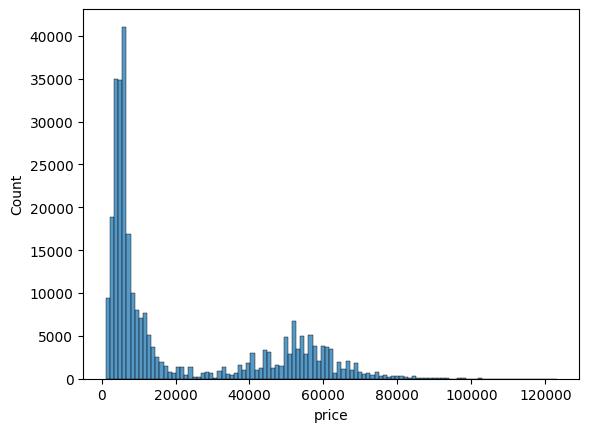

In [9]:
sns.histplot(df['price'])


<Axes: ylabel='price'>

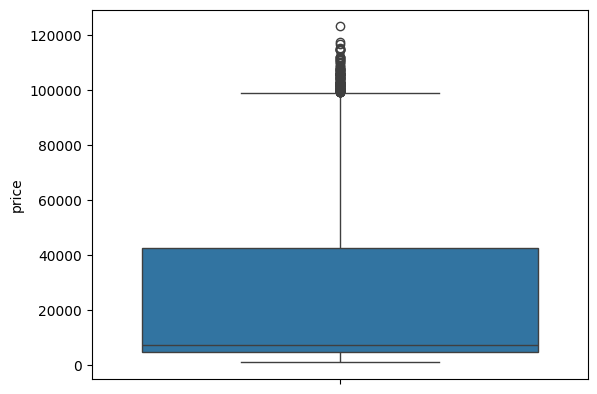

In [10]:
sns.boxplot(df['price'])

<Axes: xlabel='duration', ylabel='Count'>

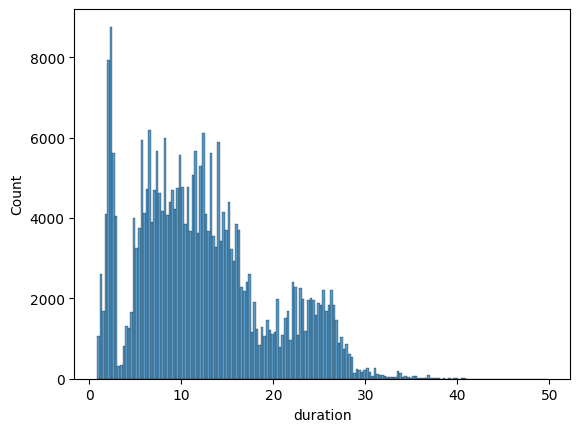

In [11]:
sns.histplot(df['duration'])

<Axes: ylabel='duration'>

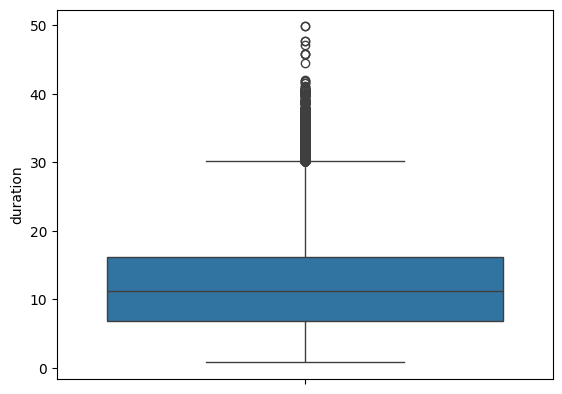

In [12]:
sns.boxplot(df['duration'])

<Axes: xlabel='days_left', ylabel='Count'>

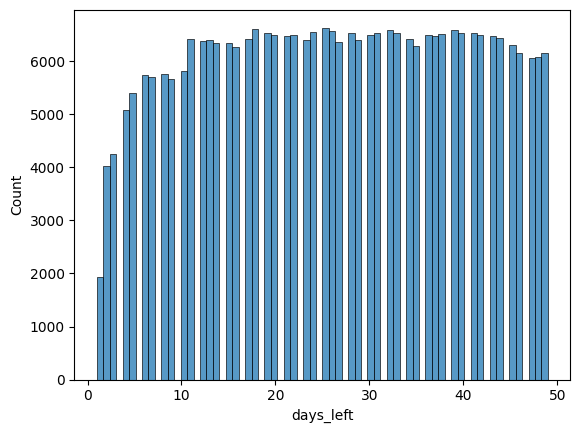

In [13]:
sns.histplot(df['days_left'])

<Axes: ylabel='days_left'>

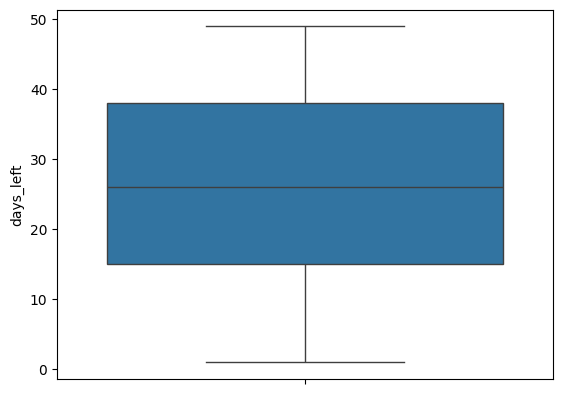

In [14]:
sns.boxplot(df['days_left'])

<Axes: xlabel='price', ylabel='days_left'>

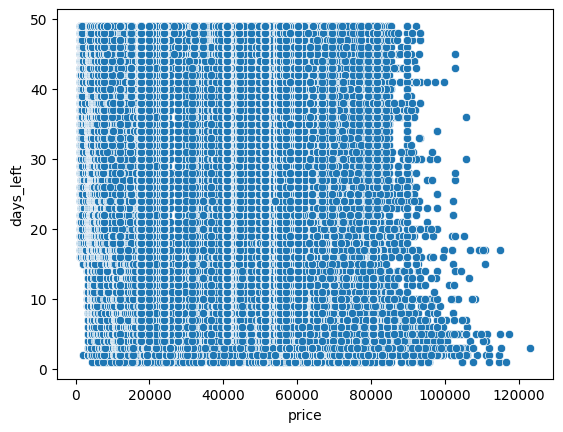

In [20]:
sns.scatterplot(x='price', y = 'days_left', data = df)

In [21]:
from scipy.stats import pearsonr
corr, _ = pearsonr(df['price'], df['days_left'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.092


In [22]:
from scipy.stats import shapiro

stat, p = shapiro(df['price'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.752, p=0.000


In [23]:
from scipy.stats import shapiro
stat, p = shapiro(df['days_left'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.959, p=0.000


puisque c'est pas normal on utilise spearman

In [25]:
from scipy.stats import spearmanr
corr, p_val = spearmanr(df['price'], df['days_left'])
print(f"Spearmans correlation= {corr:4f}, p_value = {p_val:4f}")

Spearmans correlation= -0.267019, p_value = 0.000000


Spearmans correlation= -0.267019, p_value = 0.000000

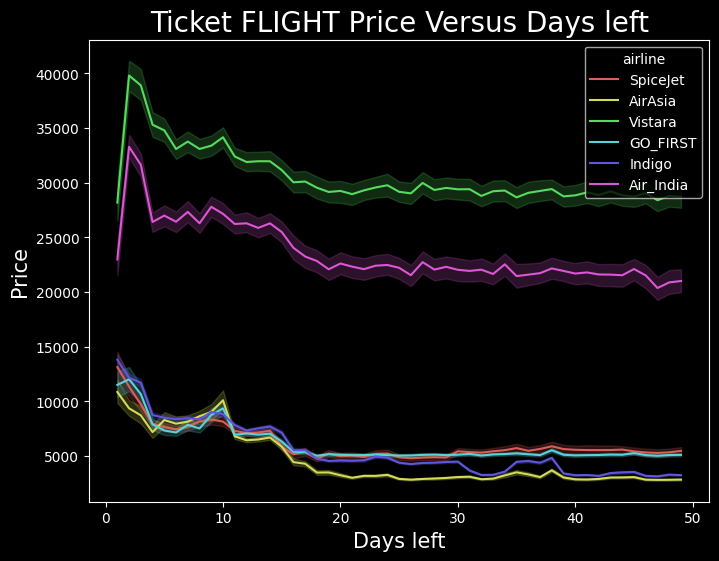

In [33]:
plt.style.use('dark_background')
plt.figure(figsize=(8,6))
sns.lineplot(data=df,x='days_left',y='price',palette='hls', hue = 'airline')
plt.title('Ticket FLIGHT Price Versus Days left',fontsize=20)
plt.xlabel('Days left',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()